# WEEK 2

## Efficient Frontier

In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import os
os.chdir("C:/Users/naz/data/")

In [2]:
ind = pd.read_csv("ind30_m_vw_rets.csv", header =0, index_col =0, parse_dates=True)/100

In [3]:
ind.index = pd.to_datetime(ind.index, format= "%Y%m").to_period("M")

In [4]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [5]:
## As we see Column Names has a lot of spaces to handle withthat we use strip 
ind.columns = ind.columns.str.strip()

In [6]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [157]:
import edhec_risk_kit as erk

In [158]:
ind = erk.get_ind_return()
er = erk.annualized_ret(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

AttributeError: 'AxesSubplot' object has no attribute 'line'

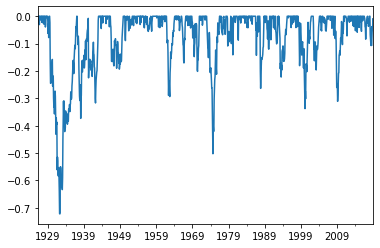

In [11]:
erk.drawdown_cal(ind["Food"])["Drawdown"].plot().line(figsize(12,6))

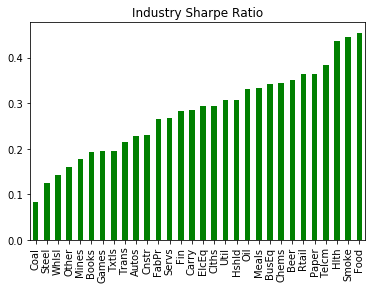

In [12]:
erk.sharpe_ratio(ind,0.03,12).sort_values().plot.bar(title="Industry Sharpe Ratio", color="green")

In [13]:
erk.var_gaussian(ind,modified=True, level =5).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [14]:
erk.var_gaussian(ind,modified=True, level =5).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

In [15]:
erk.sharpe_ratio(ind,0.03,12).sort_values()

Coal     0.084275
Steel    0.126052
Whlsl    0.143494
Other    0.160862
Mines    0.177109
Books    0.192686
Games    0.194420
Txtls    0.194906
Trans    0.214624
Autos    0.227548
Cnstr    0.229351
FabPr    0.265297
Servs    0.267263
Fin      0.282243
Carry    0.285916
ElcEq    0.293063
Clths    0.293105
Util     0.306945
Hshld    0.307349
Oil      0.330358
Meals    0.332717
BusEq    0.342974
Chems    0.344903
Beer     0.351780
Rtail    0.364325
Paper    0.364722
Telcm    0.383294
Hlth     0.437783
Smoke    0.446361
Food     0.454770
dtype: float64

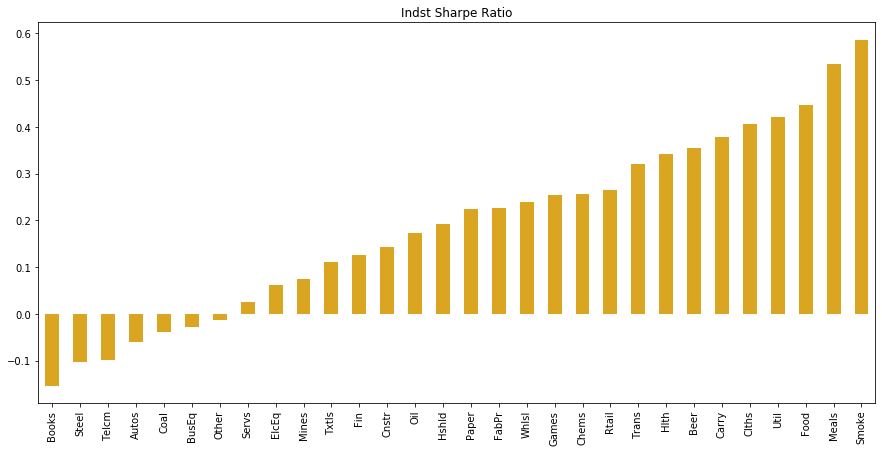

In [16]:
erk.sharpe_ratio(ind["2000":],0.03,12).sort_values().plot.bar(title ="Indst Sharpe Ratio",color ="goldenrod", figsize=(15,7))

### How to Find COVARIANCE MATRIX

In [17]:
cov_matrix = ind["1995":].cov()

## How to draw Efficient Frontier

In [18]:
n_times = np.repeat(0.25,4)

In [85]:
weights = [np.array([w,1-w]) for w in np.linspace(0,1,20)]

In [15]:
l = ["Games","Fin"]
weights = [np.array([w,1-w]) for w in np.linspace(0,1,20)]
returns = [erk.port_ret(w,er[l]) for w in weights]
vol =[erk.port_vola(w,cov.loc[l,l]) for w in weights]

NameError: name 'np' is not defined

In [88]:
import numpy as np

In [89]:
data.plot.scatter(x="Vol", y="R", figsize= (12,6))

NameError: name 'data' is not defined

In [159]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
erk.plot_ef2(ind[["Food","Beer"]],20)

TypeError: plot_ef2() missing 1 required positional argument: 'cov'

In [20]:
from scipy.optimize import minimize

In [39]:
weights15 = erk.minimize_vol(0.15,er[l],cov.loc[l,l])
vol15 = erk.port_vola(weights15,cov.loc[l,l])
vol15

0.056163669406706564

In [45]:
l = ['Smoke', 'Fin', 'Games', 'Coal']
weights10 = erk.minimize_vol(10,er[l], cov.loc[l,l])
vol10 = erk.port_vola(weights10,cov.loc[l,l])
vol10

0.13653194583868183

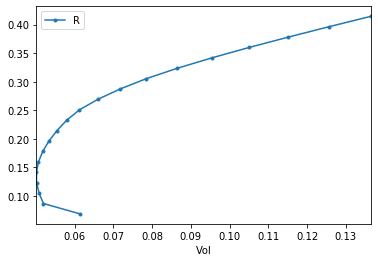

In [47]:
erk.plot_ef(er[l],20, cov.loc[l,l])

## Max Sharpe Ratio Portfolio

In [92]:
ind = erk.get_ind_return()
er = erk.annualized_ret(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()
plt = erk.plot_ef(20,er,cov)
plt.set_xlim(left = 0)

TypeError: plot_ef() missing 1 required positional argument: 'rf'

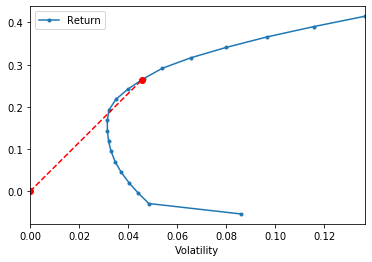

In [81]:
ax= erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0)
rf = 0.1

return_msr = erk.port_ret(weight_msr,er)
vola_msr = erk.port_vola(weight_msr,cov)

#Add Capital Market Line
cml_x = [0, vola_msr]
cml_y =[0, return_msr]
ax.plot(cml_x,cml_y, color ="red", marker = "o", linestyle ="dashed")

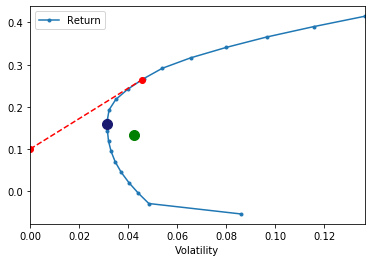

In [156]:
erk.plot_ef(20,er,cov, 0.1,show_cml =True, show_ew=True, show_gmv=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


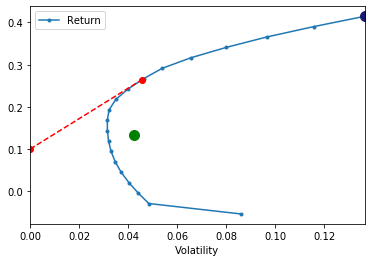

In [167]:
%load_ext autoreload
%autoreload 2
erk.plot_ef(20,er,cov, 0.1,show_cml =True, show_ew=True, show_gmv=True)

# Week 2 Graded QUIZ

In [247]:
import numpy as np
import pandas as pd
hfi = pd.read_csv("edhec-hedgefundindices.csv", header = 0, index_col = 0, parse_dates =True)
hfi.index = pd.to_datetime(hfi.index, format = "%Y-%m-%d").to_period("M")
#hfi = erk.annualized_ret(hfi["2000":],12)


In [249]:
DD = hfi["2000":]["Distressed Securities"]/100
DD

date
2000-01    0.0088
2000-02    0.0421
2000-03    0.0103
2000-04   -0.0101
2000-05   -0.0132
            ...  
2018-07    0.0093
2018-08    0.0002
2018-09    0.0050
2018-10   -0.0158
2018-11   -0.0193
Freq: M, Name: Distressed Securities, Length: 227, dtype: float64

In [211]:
#Cornish-Fisher Adjusted VaR
erk.var_gaussian(DD, level=1, modified=True)

0.04966909110627918

In [212]:
#Parametric VaR
erk.var_gaussian(DD, level=1, modified=False)

0.03143017693928047

In [213]:
#Histroric VaR
erk.var_historic(DD,level=1)

0.042642

In [545]:
ind = erk.get_ind_return()
er = erk.annualized_ret(ind["2013":"2017"],12)
l = ["Books","Steel","Oil","Mines"]
r = er[l]
cov_all = ind.cov()
cov = cov_all.loc[l,l]
r

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [558]:
wgmv =erk.gmv(0.1,cov)

In [526]:
# EW Portfolio
rf =0.1
#erk.plot_ef(20,r,cov, rf,show_cml =True, show_ew = True, show_gmv=True)
erk.gmv(cov)

array([0.25444, 0.     , 0.56604, 0.17952])

In [531]:
# 5.MSR
np.set_printoptions(precision =4,suppress = True )

erk.msr(rf,r,cov)

array([0., 1., 0., 0.])

In [574]:
# GMV PORTFOLIO WEIGHTS
n_point = cov.shape
wgmv = erk.msr(0.1, np.repeat(1,4),cov)
wgmv


array([0.2544, 0.    , 0.566 , 0.1795])

In [398]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## QUESTION 12


In [568]:
%load_ext autoreload
%autoreload 2
wmsr = erk.msr(rf,r,cov)
wgmv = erk.gmv(rf,cov)
ind_2018 = ind["2018"][l]
cov2018 = ind["2018"][l].cov()
port2018_ret = erk.annualized_ret(ind_2018,12)
erk.port_vola(wmsr,cov2018)*a
erk.port_vola(wgmv,cov2018)*a

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.19683079047089644

In [367]:
import edhec_risk_kit_111 as erktest

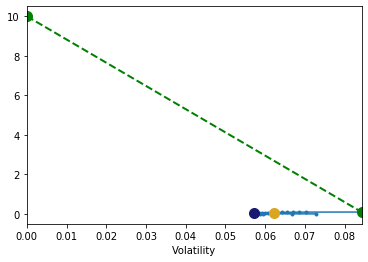

In [396]:
erktest.plot_ef(25,r,cov=cov,riskfree_rate=rf,show_gmv=True,show_cml=True,show_ew=True)

array([0.17952, 0.25444, 0.     , 0.56604])

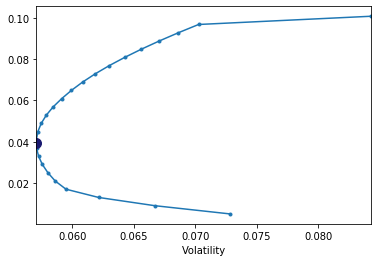

In [399]:
erktest.plot_ef(25,r,cov,show_gmv=True,riskfree_rate=rf)

array([0.17952, 0.25444, 0.     , 0.56604])

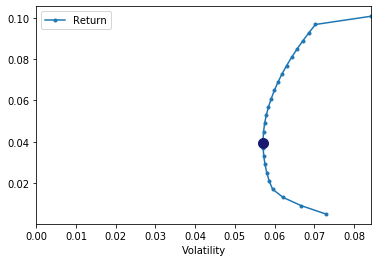

In [403]:
erk.plot_ef(25,r,cov,rf,show_gmv=True)

In [404]:
l

['Mines', 'Books', 'Steel', 'Oil']

In [575]:
0.0634623 * a

0.2198398559303567

In [579]:
wgmv = erk.gmv(cov2018)
erk.port_vola(wgmv,cov2018)*a

0.15269232284490572